In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
from colorama import Style, Fore, Back
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
grn_bck = Back.GREEN
res = Style.RESET_ALL

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Implementing k-means

In [2]:
class Kmeans: 
    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.centroids = np.random.rand(self.k, self.data.shape[1])
        self.distance = np.empty((self.k, len(data)))
        self.group = np.empty(len(data))

        self.iter = None
    
    def calc_dist(self): 
        # Calculate distance for each point in data, centroids
        x = np.array([(data - c)**2 for c in self.centroids]).sum(axis=2)
        self.distance = x
    
    def assign_groups(self): 
        self.group = self.distance.argmin(axis=0)

    def calc_centroids(self): 
        for i in range(self.k): 
            self.centroids[i] = np.mean(self.data[self.group==i])


    def fit(self, iter): 
        self.iter = iter
        self.centroids = self.data[np.random.randint(0, self.data.shape[0], self.k)]
        for i in range(self.iter): 
            self.calc_dist()
            self.assign_groups()
            self.calc_centroids()

In [3]:
means = np.array([[0, 0], [20, 20], [40, -20], [40, 80], [30, 30]])
var = np.ones((5, 2))*8

data = np.empty((0, 2))
for i in range(5): 
    data = np.vstack([data, np.random.normal(means[i], var[i], (1000, 2))])

kmeans = Kmeans(data, 5)
# kmeans.centroids = means
kmeans.fit(100)

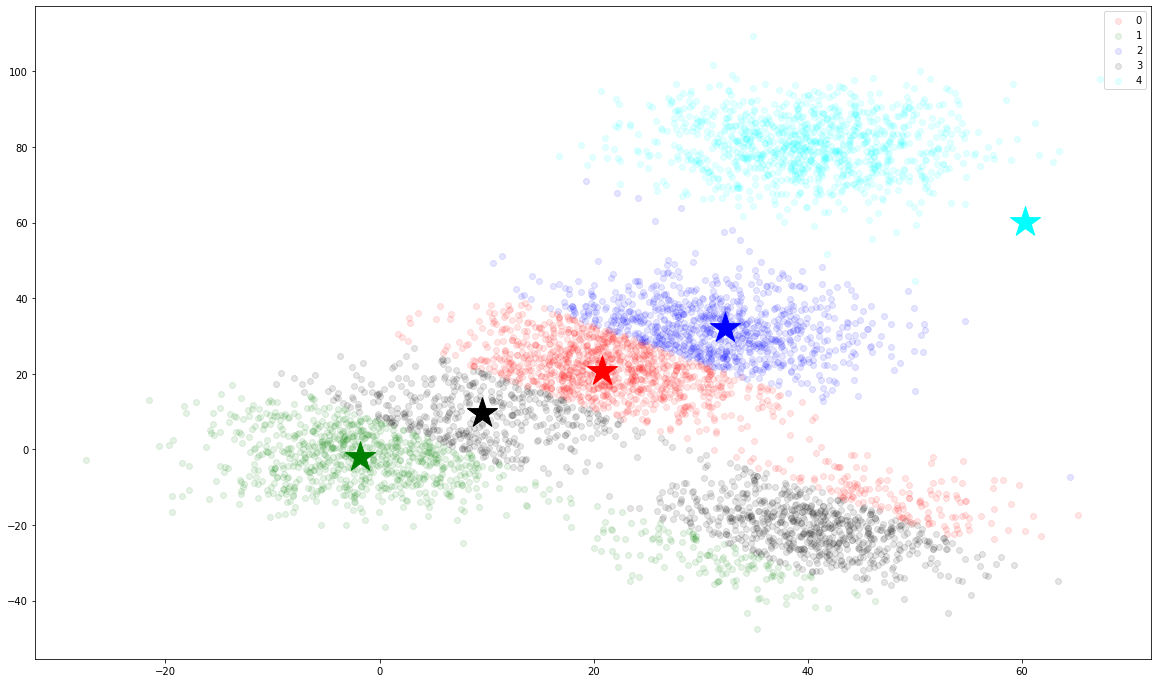

In [4]:
colors = ['red', 'green', 'blue', 'black', 'cyan']
plt.figure(figsize=(20, 12))
for k in range(kmeans.k): 
    data = kmeans.data[kmeans.group==k]
    plt.scatter(data[:, 0], data[:, 1], c=colors[k], label=k, alpha=0.1)
    plt.scatter(kmeans.centroids[k, 0], kmeans.centroids[k, 1], c=colors[k], marker='*', s=1000)

plt.legend()
plt.show()

# Exercise 4-1.
> Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call np.corrcoef and spatial.distance.cosine. Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.

In [22]:
a = np.array([[1], [2], [3], [4]])
b = np.array([[101], [102], [103], [104]])

def corr_cossim(a, b): 
    # Pearson Correlation 
    a_ = a - np.mean(a)
    b_ = b - np.mean(b)

    p_corr = np.dot(a_.T, b_) / (np.sqrt(np.dot(a_.T, a_)) * np.sqrt(np.dot(b_.T, b_)))


    # Cosine Similarity
    c_sim = np.dot(a.T, b) / (np.sqrt(np.dot(a.T, a)) * np.sqrt(np.dot(b.T, b)))

    return p_corr, c_sim

p_corr, c_sim = corr_cossim(a, b)

print(f"Pearson Correlation of the two vectors: ".ljust(50), f"{red}{p_corr[0, 0]:.4f}{res}")
print(f"Cosine Similarity of the two vectors: ".ljust(50), f"{red}{c_sim[0, 0]:.4f}{res}")

Pearson Correlation of the two vectors:            1.0000
Cosine Similarity of the two vectors:              0.9173


# Exercise 4-2.
> Let’s continue exploring the difference between correlation and cosine similarity. Create a variable containing the integers 0 through 3, and a second variable equaling the first variable plus some offset. You will then create a simulation in which you systematically vary that offset between −50 and +50 (that is, the first iteration of the simulation will have the second variable equal to [−50, −49, −48, −47]). In a for loop, compute the correlation and cosine similarity between the two variables and store these results. Then make a line plot showing how the correlation and cosine similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

In [60]:
base = np.arange(4).reshape(-1, 1)
offset = np.arange(-50, 51)

P_CORR = []
C_SIM = []
for off in offset: 
    vec = base + off
    p_corr, c_sim = corr_cossim(base, vec)

    P_CORR.append(p_corr[0, 0])
    C_SIM.append(c_sim[0, 0])


fig = go.Figure()

# Scatter trace for P_CORR
fig.add_trace(go.Scatter(x=list(range(len(P_CORR))), y=P_CORR, mode='markers', name='P_CORR', line={'color': '#000000'}, marker=dict(size=10)))

# Scatter trace for C_SIM
fig.add_trace(go.Scatter(x=list(range(len(C_SIM))), y=C_SIM, mode='markers+lines', name='C_SIM', line={'color':'#9C9C9C'}, marker=dict(size=10)))

# Update layout
fig.update_layout(
    title='Scatter Plot of P_CORR and C_SIM',
    xaxis=dict(title='Index'),
    yaxis=dict(title='r or c')
)

fig.update_xaxes(range=[-5, 110], dtick=10, gridcolor='#757575', gridwidth=0.1, zeroline=False)
fig.update_yaxes(range=[-1.5, 1.5], dtick=10, gridcolor='#757575', gridwidth=0.1, zeroline=False)


fig.update_layout(plot_bgcolor='white', title='Exercise 4-2')


fig.show()

![Alt text](image.png)

# Exercise 4-4.

> Compare between `np.corrcoef` and your implemented function in terms of time 

In [129]:
import time

def corr(a, b): 
    a_ = a - np.mean(a) + 1e-9
    b_ = b - np.mean(b) + 1e-9
    
    return np.dot(a_.T, b_) / (np.sqrt(np.dot(a_.T, a_)) * np.sqrt(np.dot(b_.T, b_)))


n = 1000
A = np.random.rand(n, 500)
B = np.random.rand(n, 500)

start_tim = time.time()
for i in range(n): 
    c = corr(A[0], B[0])

time1 = time.time() - start_tim

start_tim = time.time()
for i in range(n): 
    c = np.corrcoef(A[0], B[0])

time2 = time.time() - start_tim


print(f"Percentage of {blk}{'np.corrcoef'}{res} time to {blk}{'custom function'}{res} time: ", f"{red}{time1/time2 * 100}{res}")


Percentage of np.corrcoef time to custom function time:  32.127788953723254


# Exercise 4-5.
> Let’s build an edge detector. The kernel for an edge detector is very simple: [−1 +1]. The dot product of that kernel with a snippet of a time series signal with constant value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep change (e.g., [1 10] would produce a dot product of 9). The signal we’ll work with is a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The first step in this exercise is to write code that creates these two time series.

/tmp/ipykernel_14115/4196017639.py:27: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



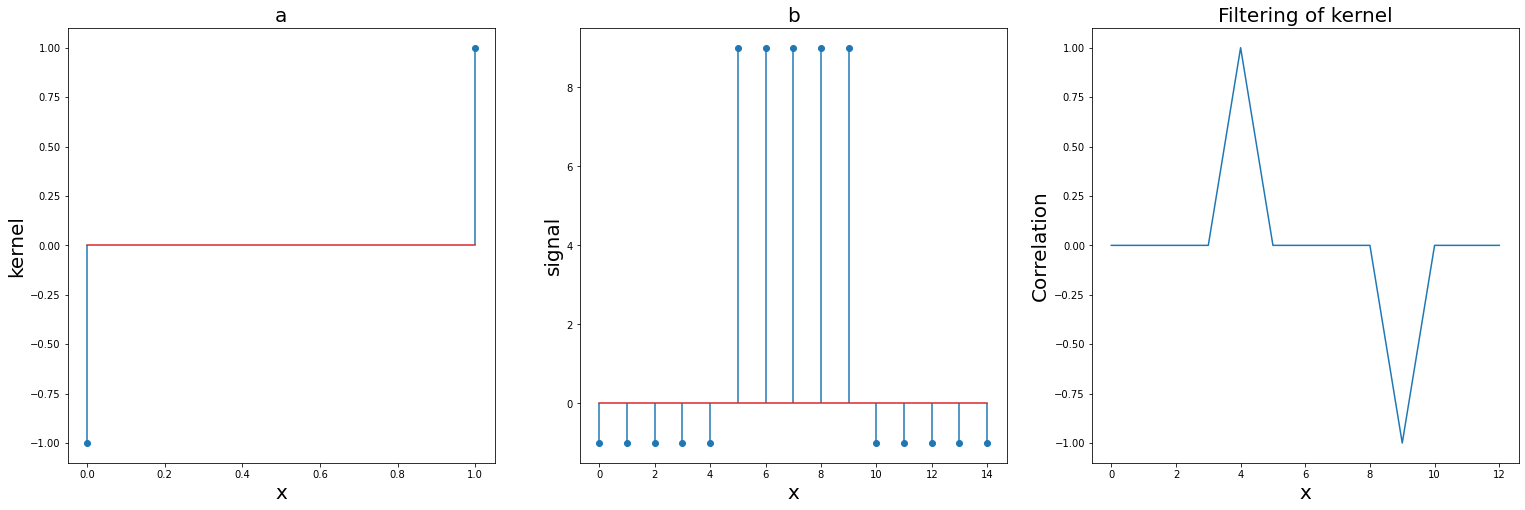

In [165]:
signal = np.hstack([np.ones(5)*-1, np.ones(5)*9, np.ones(5)*-1]).reshape(-1, 1)
kernel = np.array([-1, 1]).reshape(-1, 1)

CORR = []

for i in range(signal.shape[0]-len(kernel)):
    CORR.append(corr(signal[i:i+len(kernel)], kernel)[0, 0])

fig, axs = plt.subplots(1, 3, figsize=(26, 8))

axs[0].stem(kernel)
axs[0].set_xlabel('x', fontdict={'size':20})
axs[0].set_ylabel('kernel', fontdict={'size':20})
axs[0].set_title('a', fontdict={'size':20})

axs[1].stem(signal)
axs[1].set_xlabel('x', fontdict={'size':20})
axs[1].set_ylabel('signal', fontdict={'size':20})
axs[1].set_title('b', fontdict={'size':20})


axs[2].plot(np.arange(len(CORR)), CORR)
axs[2].set_xlabel('x', fontdict={'size':20})
axs[2].set_ylabel('Correlation', fontdict={'size':20})
axs[2].set_title('Filtering of kernel', fontdict={'size':20})

fig.show()